In [1]:
from utils.env import SimplifiedStockTradingEnv
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
import quandl
import torch

yf.pdr_override() # <== that's all it takes :-)

# Replace 'AAPL' with the stock symbol you're interested in
stock_symbol = 'SPY'

# Define the time period for historical data
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 1, 1)

# download dataframe
data = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)

# Display the first few rows
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,305.058441,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,302.748444,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,303.903473,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,303.048950,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,304.664062,68296000


In [2]:
env = SimplifiedStockTradingEnv(data)

In [3]:
print("All variables are : ")
print("- Time range to look back ", env.T)
print("- Start Balance ", env.start_balance)
print("- Number of stocks to look at ", env.d)
print("- Max share price over the actions ", env.max_share_price)
print("- Action space ", env.action_space)
print("- Observation Space ", env.observation_space)
print("- Current step ", env.current_step)
print("- Current balance ", env.balance)
print("- Number of shares held ", env.shares_held)

All variables are : 
- Time range to look back  20
- Start Balance  1000.0
- Number of stocks to look at  1
- Max share price over the actions  477.4800109863281
- Action space  Box(-1.0, 1.0, (1,), float32)
- Observation Space  Box(0.0, 1.0, (22,), float32)
- Current step  0
- Current balance  1000.0
- Number of shares held  0.0


Text(0.5, 1.0, 'Evolution du prix de SNP500 en fonction du temps ')

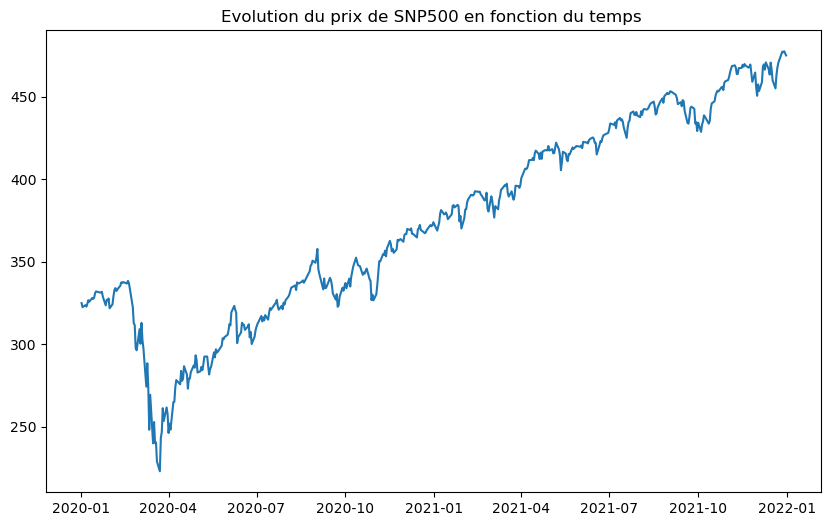

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(env.df.index.to_numpy(), env.df['Close'].to_numpy(), linestyle='-')
plt.title("Evolution du prix de SNP500 en fonction du temps ")


In [5]:
env._next_observation()

([], 1000.0, 0.0)

In [6]:
print(env.df['Close']/env.max_share_price)

Date
2020-01-02    0.680384
2020-01-03    0.675232
2020-01-06    0.677809
2020-01-07    0.675903
2020-01-08    0.679505
                ...   
2021-12-27    0.999539
2021-12-28    0.998722
2021-12-29    1.000000
2021-12-30    0.997235
2021-12-31    0.994722
Name: Close, Length: 505, dtype: float64


In [7]:
env.reset()

([0.68038449284213,
  0.6752324626032169,
  0.6778085096795904,
  0.6759026630657613,
  0.6795049106596451,
  0.6841123950335116,
  0.6821437211209336,
  0.6868350604449106,
  0.6857878961898727,
  0.6873376788349019,
  0.6930552186763892,
  0.695212374485214,
  0.6938510098225976,
  0.693934800858874,
  0.6947306559189164,
  0.688552361248659,
  0.6775152730095395,
  0.6846150773373368,
  0.6840495677347627,
  0.6862695508423364,
  0.6738083345556855],
 1000.0,
 0.0)

In [8]:
env.step(0)

(([0.68038449284213,
   0.6752324626032169,
   0.6778085096795904,
   0.6759026630657613,
   0.6795049106596451,
   0.6841123950335116,
   0.6821437211209336,
   0.6868350604449106,
   0.6857878961898727,
   0.6873376788349019,
   0.6930552186763892,
   0.695212374485214,
   0.6938510098225976,
   0.693934800858874,
   0.6947306559189164,
   0.688552361248659,
   0.6775152730095395,
   0.6846150773373368,
   0.6840495677347627,
   0.6862695508423364,
   0.6738083345556855],
  1000.0,
  0.0),
 0.0,
 False)